<a href="https://colab.research.google.com/github/claudioaf/Python/blob/main/Dealing_with_unbalanced_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# You can also see this noteebok at Kaggle
# Link: https://www.kaggle.com/cludiofalco/dealing-with-unbalanced-data?scriptVersionId=45061910

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Importing data
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DATASET/Sample_Dataset.csv')
df.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,obj1
0,1,1,17.2131,1,1.0,1,3,2,3,1,NaN,1,0.0,1,1,1,14,1.0,1,1.0,1,1.0,37,2250,1.0,1.0,NaN,1.0,9.0,1,40.0,13.0,32.766370,NaN,NaN,0
1,2,35,0.1747,1,1.0,2,1,1,2,2,NaN,1,17.0,3,3,3,3,1.0,1,1.0,1,1.0,59,3488,1.0,1.0,12.0,1.0,10.0,1,12.0,23.0,210.567669,NaN,NaN,0
2,3,1,35.3943,1,NaN,2,2,2,2,2,NaN,1,0.0,1,1,1,1,1.0,1,1.0,1,1.0,52,2493,1.0,1.0,30.0,1.0,9.0,1,24.0,16.0,0.000111,NaN,NaN,1
3,4,1,4.4873,1,1.0,1,1,1,2,1,NaN,1,0.0,1,13,13,13,1.0,1,1.0,1,1.0,45,4050,1.0,1.0,NaN,1.0,9.0,1,36.0,7.0,9.380889,NaN,NaN,0
4,5,1,NaN,1,NaN,1,1,1,1,1,NaN,1,0.0,1,1,1,1,1.0,1,1.0,1,1.0,33,2493,1.0,1.0,30.0,1.0,10.0,1,12.0,20.0,28.089135,NaN,NaN,0


In [ ]:
# Quantity of items 0 and 1
cnt = len(df['obj1'])
cnt

4528

In [ ]:
# Record count equal to 0
cnt_obj_0 = len(df[df['obj1']==0])
cnt_obj_0

3694

In [ ]:
# Record count equal to 1
cnt_obj_1 = len(df[df['obj1']==1])
cnt_obj_1

834

In [ ]:
# How much more is 0 compared to 1
qtd_vezes_maior = '{:.2f}'.format(cnt_obj_0/cnt_obj_1)
print('The quantity of 0 is '+str(qtd_vezes_maior)+' times greater than the quantity of 1')

The quantity of 0 is 4.43 times greater than the quantity of 1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


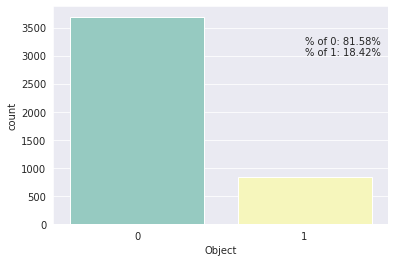

In [ ]:
# Setting the background for the chart
sns.set_style('darkgrid')

# Building the count graph
ax = sns.countplot(df['obj1'], palette="Set3")

# Percentage of 0 and 1
perc_0 = '{:.2f}%'.format(100*(cnt_obj_0/cnt))
perc_1 = '{:.2f}%'.format(100*(cnt_obj_1/cnt))

# Set the Xlabel
plt.xlabel('Object')

# Inserting the percentages on the chart
plt.text(1,3000,"% of 0: "+perc_0+"\n% of 1: "+perc_1)

# Show the graph
plt.show()


In [ ]:
# Shuffle the data before creating the subsets
df = df.sample(frac=1)

# Defining the size of the range we want from the data [0 and 1]
# We need to use the loc function to access the dataset in the dataset from a starting and ending position
df_0 = df.loc[df['obj1']==0][:834]
df_01 = df.loc[df['obj1']==1]

# Concatenating the subsets
df2 = pd.concat([df_0,df_01])

# Shuffling the data
new_df = df2.sample(frac=1, random_state = 50)
new_df.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,obj1
4328,4329,2,0.0141,3,2.0,2,4,4,1,3,1.0,1,37.0,4,6,6,6,1.0,2,1.0,1,1.0,55,5000,1.0,1.0,30.0,1.0,10.0,1,12.0,10.0,7.7839,NaN,NaN,1
3226,3227,28,NaN,1,1.0,1,1,1,1,1,NaN,1,0.0,1,1,1,1,1.0,1,1.0,1,1.0,38,3624,1.0,1.0,60.0,1.0,5.0,1,36.0,22.0,206.6244,NaN,NaN,0
1016,1017,2,123.9579,6,3.0,1,3,1,2,3,NaN,1,0.0,6,6,6,6,1.0,1,1.0,1,1.0,45,5500,1.0,1.0,24.0,1.0,9.0,1,25.0,15.0,8.8231,NaN,NaN,1
1642,1643,1,0.0229,1,1.0,1,1,1,1,1,NaN,1,18.0,2,2,2,2,1.0,1,1.0,1,1.0,55,2600,1.0,1.0,60.0,1.0,10.0,1,127.0,19.0,13.5139,NaN,NaN,0
2105,2106,2,1235.3641,1,1.0,1,1,1,1,1,NaN,1,0.0,1,1,1,1,1.0,2,1.0,1,1.0,37,3929,1.0,1.0,60.0,1.0,10.0,1,36.0,13.0,22.7778,NaN,NaN,0


In [ ]:
# Checking the new distribution of records equal to 0 and 1
print(new_df['obj1'].value_counts()/len(new_df))

1    0.5
0    0.5
Name: obj1, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


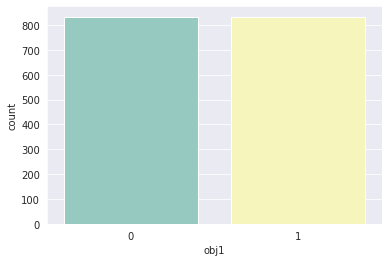

In [ ]:
# Checking the balance on the chart
ax2 = sns.countplot(new_df['obj1'], palette="Set3")